In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set the dataset path (update if needed)
dataset_dir = '/content/drive/MyDrive/split_dataset/split_dataset'

# Check the classes (folder names)
classes = os.listdir(dataset_dir)
print("Classes found:", classes)

# Set image parameters
img_height, img_width = 224, 224
batch_size = 32


Classes found: ['Paintings', 'Cracks', 'Corrosion']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define image data generator with 20% validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 22 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(classes), activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
epochs = 10  # You can increase this if needed

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2273 - loss: 1.1223 - val_accuracy: 0.2500 - val_loss: 19.1747
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4545 - loss: 21.2726 - val_accuracy: 0.5000 - val_loss: 23.9407
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.4545 - loss: 21.9208 - val_accuracy: 0.2500 - val_loss: 10.0086
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.5000 - loss: 13.6691 - val_accuracy: 0.2500 - val_loss: 7.1325
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.3636 - loss: 8.3961 - val_accuracy: 0.5000 - val_loss: 1.6282
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.5000 - loss: 3.6266 - val_accuracy: 0.5000 - val_loss: 2.3650
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.2727 - loss: 4.2299 - val_accuracy: 0.2500 - val_loss: 2.5993
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.5000 - loss: 2.5063 - val_accuracy: 0.2500 - val_loss:

In [ ]:
model.save('/content/drive/MyDrive/damage.h5')

In [1]:
# Plot training vs validation accuracy



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Corrosion


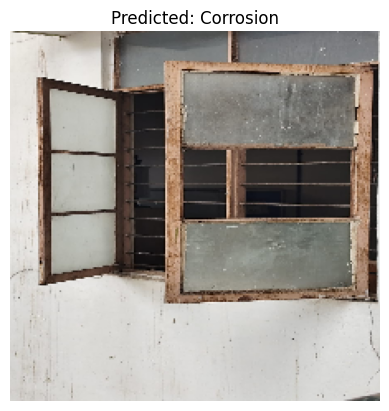

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/damage.h5')  # or .keras

# Class names (must match training order)
class_names = ['Corrosion', 'Cracks', 'Paintings']  # Update if different

# Image parameters
img_height, img_width = 224, 224

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    print(f"Predicted class: {predicted_class}")

    # Optional: Show image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Example usage
predict_image('/content/drive/MyDrive/split_dataset/split_dataset/Corrosion/IMG-20250510-WA0034.jpg')